In [19]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('spam1.csv')

In [27]:
df.shape

(5572, 5)

## Data Cleaning

In [30]:
df.isnull().sum()

v1       0
v2       0
v3    5522
v4    5560
v5    5566
dtype: int64

In [31]:
df = df.drop(columns=['v3','v4','v5'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [33]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [34]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [39]:
df['target'] = encoder.fit_transform(df['target'])

In [40]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [41]:
df.duplicated().sum()

403

In [45]:
df = df.drop_duplicates(keep='first')

In [46]:
df.shape

(5169, 2)

## EDA

In [50]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [93]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [54]:
import matplotlib.pyplot as plt

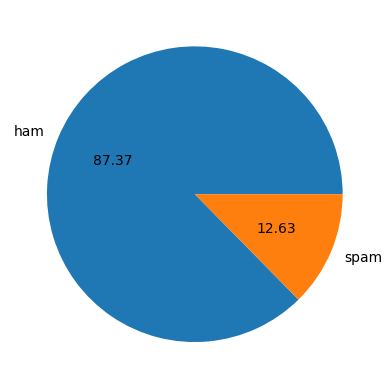

In [57]:
# data is imbalanced. See below
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')
plt.show()

In [58]:
# create 3 columns- num_chars, num_words, num_sentences

df['num_chars'] =  df['text'].apply(len)

In [60]:
import nltk

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anukatiy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [67]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [255]:
sampleText = ['I will do this and then will be doing that. Food is great. It finished faster than I thought.']
nltk.word_tokenize(sampleText[0])

['I',
 'will',
 'do',
 'this',
 'and',
 'then',
 'will',
 'be',
 'doing',
 'that',
 '.',
 'Food',
 'is',
 'great',
 '.',
 'It',
 'finished',
 'faster',
 'than',
 'I',
 'thought',
 '.']

In [68]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [73]:
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.619849,2.017605
std,58.174846,13.414475,1.485964
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [75]:
 df[df['target']==0][['num_chars','num_words','num_sent']].describe() ## ham

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.241585,1.876661
std,56.356802,13.549707,1.430122
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
 df[df['target']==1][['num_chars','num_words','num_sent']].describe() ## spam

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,28.151608,2.992343
std,30.014336,7.128960,1.499980
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


In [78]:
import seaborn as sns

<Axes: ylabel='Count'>

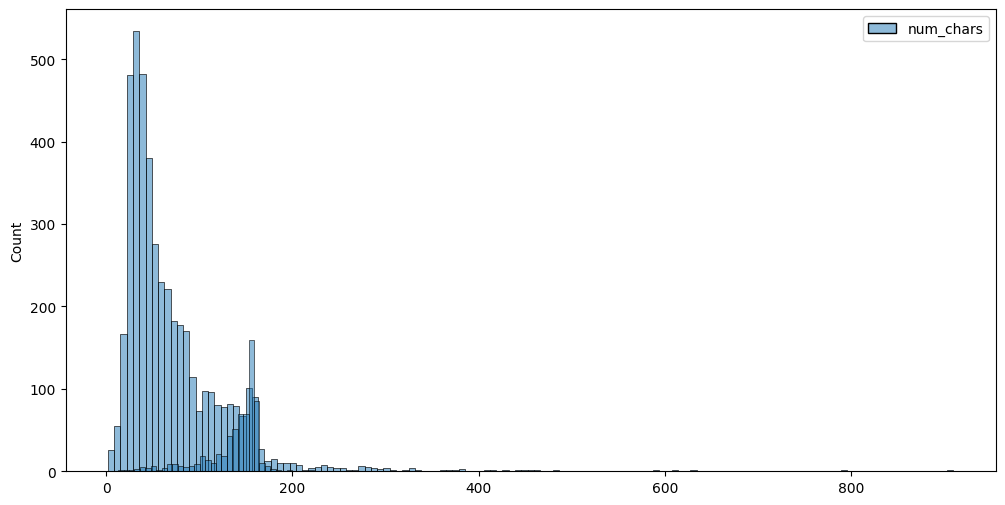

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0][['num_chars']])
sns.histplot(df[df['target']==1][['num_chars']],color='red')

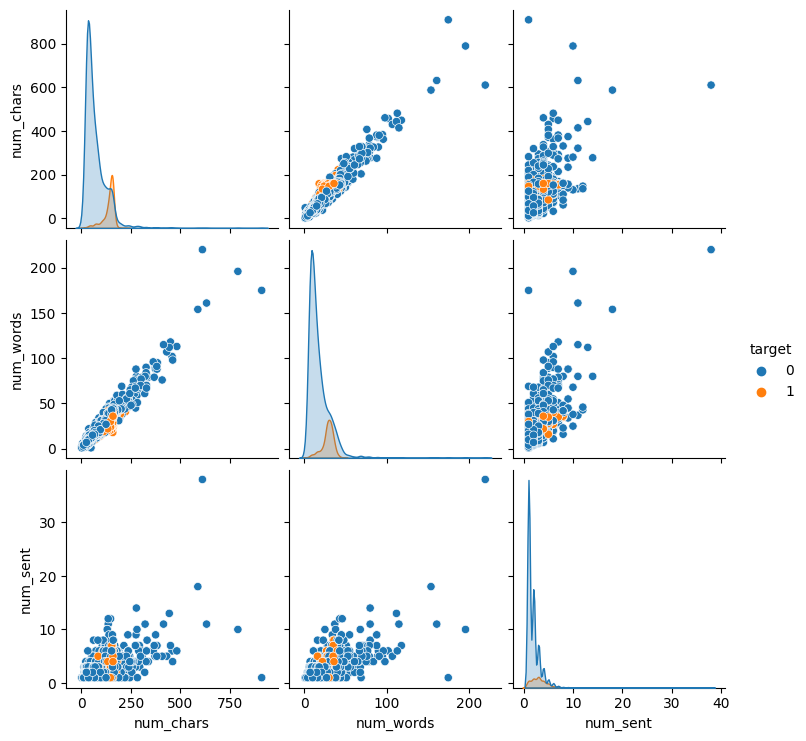

In [94]:
sns.pairplot(df,hue='target')

In [100]:
df[['target','num_chars','num_words','num_sent']].corr()

,target,num_chars,num_words,num_sent
target,1.000000,0.382785,0.270222,0.249460
num_chars,0.382785,1.000000,0.966551,0.612323
num_words,0.270222,0.966551,1.000000,0.674193
num_sent,0.249460,0.612323,0.674193,1.000000


In [ ]:
## High correlationship between num_chars, num_words, num_sents. Multicollinearity exists. 
## Only one of these can be used with target column - num_chars with highest correlation with target

<Axes: >

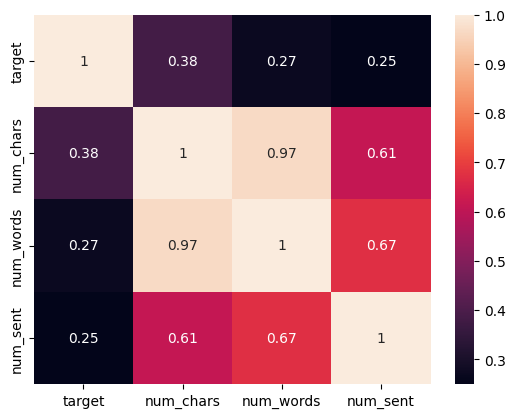

In [102]:
sns.heatmap(df[['target','num_chars','num_words','num_sent']].corr(),annot = True)

## Data/Text PreProcessing
  - Lower case
  - Tokenization
 - Remove special characters, stop words
 - Stemming / Leemitization

In [143]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transformText(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y =[]
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(ps.stem(i))
    return " ".join(y); 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anukatiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
df['transformed_text'] = df['text'].apply(transformText)

In [145]:
df.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [170]:
from wordcloud import WordCloud
wc = WordCloud(width=450, height=450,background_color='white',min_font_size=12)

In [171]:
hamWC = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

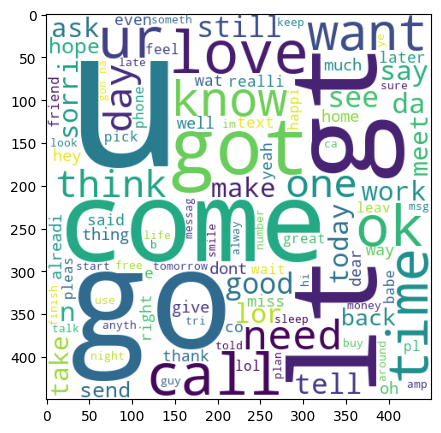

In [174]:
plt.figure(figsize=(12,5))
plt.imshow(hamWC)

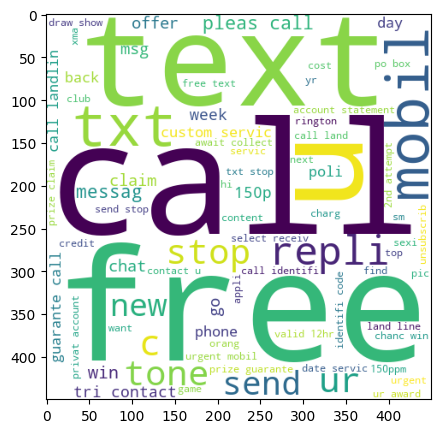

In [175]:
spamWC = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(12,5))
plt.imshow(spamWC)

In [186]:
def AllWordsinCorpus(wordlist):
    words= []
    for string in wordlist:
        for word in string.split():
            words.append(word)
    return words    

In [193]:
spamwordlist = df[df['target'] ==1]['transformed_text'].tolist()
spamWordCorpus = AllWordsinCorpus(spamwordlist)

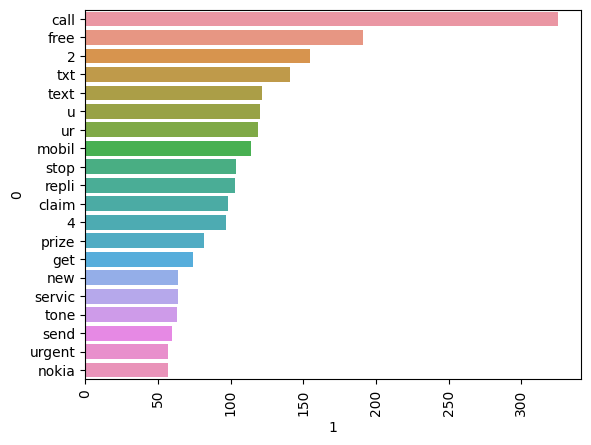

In [206]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spamWordCorpus).most_common(20))[1],y=pd.DataFrame(Counter(spamWordCorpus).most_common(20))[0])
plt.xticks(rotation='vertical')
plt.show()

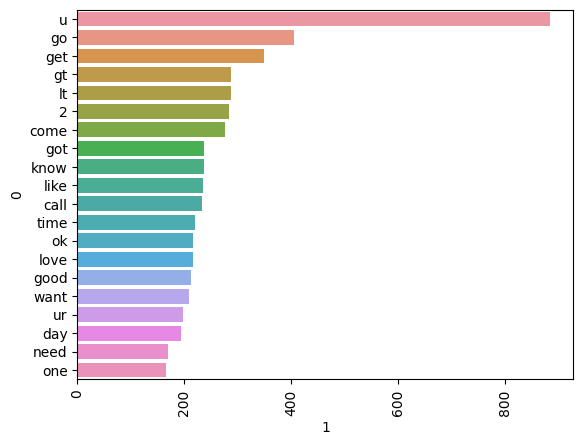

In [207]:
hamwordlist = df[df['target'] ==0]['transformed_text'].tolist()
hamWordCorpus = AllWordsinCorpus(hamwordlist)
sns.barplot(x=pd.DataFrame(Counter(hamWordCorpus).most_common(20))[1],y=pd.DataFrame(Counter(hamWordCorpus).most_common(20))[0])
plt.xticks(rotation='vertical')
plt.show()

## Model Building 

In [239]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 2000)

In [240]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray() 

In [212]:
Y = df['target'].values

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=2)

In [217]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [216]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [226]:
gnb.fit(x_train, y_train)
y_predgnb = gnb.predict(x_test)
print (accuracy_score(y_test, y_predgnb))
print (confusion_matrix(y_test, y_predgnb))
print (precision_score(y_test, y_predgnb))

0.879110251450677
[[790 106]
 [ 19 119]]
0.5288888888888889


In [227]:
mnb.fit(x_train, y_train)
y_predmnb = mnb.predict(x_test)
print (accuracy_score(y_test, y_predmnb))
print (confusion_matrix(y_test, y_predmnb))
print (precision_score(y_test, y_predmnb))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [229]:
bnb.fit(x_train, y_train)
y_predbnb = bnb.predict(x_test)
print (accuracy_score(y_test, y_predbnb))
print (confusion_matrix(y_test, y_predbnb))
print (precision_score(y_test, y_predbnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [249]:
lr = LogisticRegression(penalty="l1", solver='liblinear')
dtc = DecisionTreeClassifier(max_depth = 5)
bnb = BernoulliNB()

In [250]:
models ={'LR':lr,'DTC': dtc,BNB':bnb}

In [260]:
def classifier_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [270]:
classifier_model(dtc, x_train, y_train, x_test, y_test)

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


TypeError: 'list' object is not callable

In [268]:
accuracy_scores = []
precision_scores = []
print (models)
for model in models.items():
    accuracy_score, precision_score = classifier_model(model, x_train, y_train, x_test, y_test)
    accuracy_scores.append(accuracy_score)
    precision_scores.append(precision_score)
    

{'LR': LogisticRegression(penalty='l1', solver='liblinear'), 'DTC': DecisionTreeClassifier(max_depth=5), 'BNB': BernoulliNB()}


AttributeError: 'tuple' object has no attribute 'fit'